## Using MoVi data in Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MoVi dataset is originally provided as `.mat` format.  
We provide some utility functions to make it easy reading MoVi files in Python environment

## Load Data

In [ ]:
!git clone https://github.com/saeed1262/MoVi-Toolbox
!pip install human-body-prior
#uninstall and re install, after installing, comment out pip comments, and restart runtime to use the new version
!pip uninstall numpy -y                   
!pip uninstall numpy-quaternion -y
!pip install numpy
!pip install numpy-quaternion
!pip install pytransform3d

%cd MoVi-Toolbox/
from MoCap.utils import *
import numpy as np
import quaternion
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline

Cloning into 'MoVi-Toolbox'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 192 (delta 40), reused 3 (delta 1), pack-reused 126
Receiving objects: 100% (192/192), 120.66 MiB | 27.84 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (37/37), done.
     |████████████████████████████████| 124 kB 45.7 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 3.3 MB 43.3 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 635 kB 58.4 MB/s 
     |████████████████████████████████| 1.2 MB 52.5 MB/s 
     |████████████████████████████████| 2.2 MB 48.4 MB/s 
     |████████████████████████████████| 890 kB 48.2 MB/s 
  Created wheel for human-body-prior: filename=human_body_prior-0.8.5.0-py3-none-any.whl size=42351 sha256=97871c2f6718d20e05576f7ceae4444f8164cf931312de67400391d4

     |████████████████████████████████| 189 kB 28.0 MB/s 
     |████████████████████████████████| 72 kB 711 kB/s 
  Created wheel for pytransform3d: filename=pytransform3d-1.9.1-py3-none-any.whl size=81746 sha256=ca626749bdb56f422dc5079b974ee0bd0768fb552ac61a4f9772a4bc25116202
  Stored in directory: /root/.cache/pip/wheels/c0/07/4f/909ab9c3955d4d6226a5401b0cc9df553842dfaa970277a0e6
Successfully built pytransform3d
/content/MoVi-Toolbox/MoVi-Toolbox/MoVi-Toolbox


RuntimeError: ignored

ImportError: ignored



```
# This is formatted as code
```

# Load imu data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# File location
amass_filename = '/content/drive/MyDrive/MoVi Data/AMASS/F_amass_Subject_1.mat'
v3d_filename = '/content/drive/MyDrive/MoVi Data/F_Subjects/F_v3d_Subject_1.mat' 
imu_filename = '/content/drive/MyDrive/MoVi Data/IMU_Subjects/imu_Subject_1.mat'

In [ ]:
# Reading MoVi files as a Python dictionary

imu_sample = mat2dict(imu_filename)
imu_sample.keys()

sample = mat2dict(amass_filename)
sample.keys()

dict_keys(['id', 'subject', 'move_0', 'move_1', 'move_2', 'move_3', 'move_4', 'move_5', 'move_6', 'move_7', 'move_8', 'move_9', 'move_10', 'move_11', 'move_12', 'move_13', 'move_14', 'move_15', 'move_16', 'move_17', 'move_18', 'move_19', 'move_20'])

In [ ]:
pretty_dict(sample, print_type=False, indent=1)

	Key: id
	Key: subject
		Key: id
		Key: sex
		Key: handedness
		Key: height
		Key: mass
		Key: age
	Key: move_0
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
		Key: jointsExpMaps_amass
		Key: jointsParent
		Key: description
	Key: move_1
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
		Key: jointsExpMaps_amass
		Key: jointsParent
		Key: description
	Key: move_2
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
		Key: jointsExpMaps_amass
		Key: jointsParent
		Key: description
	Key: move_3
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
		Key: jointsExpMaps_amass
		Key: jointsParent
		Key: description
	Key: move_4
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
		Key: jointsExpMaps_amass
		Key: jointsParent
		Key: description
	Key: move_5
		Key: RootTranslation_amass
		Key: jointsBetas_amass
		Key: jointsLocation_amass
	

In [ ]:
#Pull Clean Header CSV
imu_header = pd.read_csv('/content/drive/MyDrive/MoVi Data/IMU_Subjects/IMU_header.csv', delimiter=',')
header = imu_header['Vars'].to_list()


filename = '/content/drive/MyDrive/MoVi Data/IMU_Subjects/imu_Subject_1.mat'

current_file = mat2dict(filename)

if (current_file.get('S1_Synched', 'Undefined key')) != 'Undefined key':
  #pull data from imu_file for S1 Session into pandas df
  current_file_S1S = pd.DataFrame(current_file['S1_Synched']['data'])
    
  #write column names from imu header master
  current_file_S1S.columns = header

  #assign column based on current subject 
  current_file_S1S['ID'] = current_file['S1_Synched']['description']
  #split description string into vars
  current_file_S1S[['session','subject_null','subject_number','synched']] = current_file_S1S['ID'].str.split(pat="_", expand = True)
  #drop useless vars from split
  current_file_S1S = current_file_S1S.drop(columns=['ID', 'subject_null'])

  #index as a column to create timeseries plot
  current_file_S1S['timestamp'] = current_file_S1S.index

#current_file_S1S.head()

#looking at subject 1
#data = current_file_S1S.loc[[current_file_S1S]["subject_number"]==1]
data = current_file_S1S
data.head()

,Hip-X-x,Hip-X-y,Hip-X-z,Hip-V-x,Hip-V-y,Hip-V-z,Hip-Q-s,Hip-Q-x,Hip-Q-y,Hip-Q-z,Hip-A-x,Hip-A-y,Hip-A-z,Hip-W-x,Hip-W-y,Hip-W-z,RightUpLeg-X-x,RightUpLeg-X-y,RightUpLeg-X-z,RightUpLeg-V-x,RightUpLeg-V-y,RightUpLeg-V-z,RightUpLeg-Q-s,RightUpLeg-Q-x,RightUpLeg-Q-y,RightUpLeg-Q-z,RightUpLeg-A-x,RightUpLeg-A-y,RightUpLeg-A-z,RightUpLeg-W-x,RightUpLeg-W-y,RightUpLeg-W-z,RightLeg-X-x,RightLeg-X-y,RightLeg-X-z,RightLeg-V-x,RightLeg-V-y,RightLeg-V-z,RightLeg-Q-s,RightLeg-Q-x,...,Spine2-A-z,Spine2-W-x,Spine2-W-y,Spine2-W-z,Spine1-X-x,Spine1-X-y,Spine1-X-z,Spine1-V-x,Spine1-V-y,Spine1-V-z,Spine1-Q-s,Spine1-Q-x,Spine1-Q-y,Spine1-Q-z,Spine1-A-x,Spine1-A-y,Spine1-A-z,Spine1-W-x,Spine1-W-y,Spine1-W-z,Spine-X-x,Spine-X-y,Spine-X-z,Spine-V-x,Spine-V-y,Spine-V-z,Spine-Q-s,Spine-Q-x,Spine-Q-y,Spine-Q-z,Spine-A-x,Spine-A-y,Spine-A-z,Spine-W-x,Spine-W-y,Spine-W-z,session,subject_number,synched,timestamp
0,0.523799,0.477254,-0.0158,-0.003592,-0.015807,0.006434,-0.155127,0.700358,0.167102,0.676392,-0.986627,0.020564,0.229234,-0.052400,-0.0175,-0.001541,0.494509,0.561181,0.208111,-0.006811,-0.007814,0.004601,0.998111,0.060408,-0.005307,0.015725,-1.014398,0.082404,-0.043309,-0.018319,-0.056139,-0.0175,0.501591,0.563402,0.626391,-0.003028,0.003669,0.003343,0.998401,-0.043534,...,0.181716,-0.050536,-0.017559,0.0175,0.522439,0.473759,-0.3065,0.002001,-0.016331,0.006582,0.9986,-0.013308,0.051395,0.006493,-0.988649,-0.012195,0.181716,-0.050536,-0.017559,0.0175,0.520199,0.473215,-0.207400,0.000715,-0.017001,0.006421,1.0,0.0,0.0,0.0,-0.986627,0.020564,0.229234,-0.052400,-0.0175,-0.001541,S1,1,Synched,0
1,0.523803,0.477126,-0.0158,-0.002723,-0.017600,0.006137,-0.155380,0.700258,0.167130,0.676441,-0.984015,0.025610,0.224376,-0.052400,-0.0175,0.007207,0.494459,0.561013,0.208096,-0.006271,-0.008968,0.004841,0.998097,0.060258,-0.005600,0.015481,-1.022245,0.081940,-0.042250,-0.014384,-0.051403,-0.0175,0.501641,0.563392,0.626441,-0.002693,0.003330,0.003330,0.998398,-0.043945,...,0.182380,-0.052898,-0.017275,0.0175,0.522513,0.473655,-0.3065,0.002108,-0.016099,0.006310,0.9986,-0.013288,0.051363,0.006500,-0.988318,-0.010047,0.182380,-0.052898,-0.017275,0.0175,0.520192,0.473057,-0.207400,0.000753,-0.016847,0.006141,1.0,0.0,0.0,0.0,-0.984015,0.025610,0.224376,-0.052400,-0.0175,0.007207,S1,1,Synched,1
2,0.523788,0.476911,-0.0158,-0.001607,-0.019954,0.006012,-0.155661,0.700156,0.167255,0.676511,-0.984496,0.026994,0.223589,-0.052399,-0.0175,0.019358,0.494390,0.560844,0.208103,-0.005561,-0.010614,0.005495,0.998101,0.060118,-0.005785,0.015167,-1.022106,0.081832,-0.046380,-0.032216,-0.052662,-0.0175,0.501711,0.563440,0.626510,-0.002234,0.002599,0.003674,0.998409,-0.044239,...,0.179183,-0.052267,-0.018355,0.0175,0.522488,0.473565,-0.3065,0.002210,-0.015794,0.006087,0.9986,-0.013347,0.051288,0.006509,-0.987874,-0.007422,0.179183,-0.052267,-0.018355,0.0175,0.520242,0.472914,-0.207400,0.001106,-0.017115,0.006012,1.0,0.0,0.0,0.0,-0.984496,0.026994,0.223589,-0.052399,-0.0175,0.019358,S1,1,Synched,2
3,0.523853,0.476709,-0.0158,-0.000560,-0.019604,0.005892,-0.156049,0.700056,0.167303,0.676497,-0.984398,0.030201,0.229154,-0.052402,-0.0175,0.017005,0.494400,0.560768,0.208090,-0.004764,-0.010781,0.005417,0.998100,0.059939,-0.005981,0.014866,-1.018066,0.082742,-0.051361,-0.056318,-0.052346,-0.0175,0.501695,0.563520,0.626500,-0.001753,0.002638,0.003789,0.998357,-0.044781,...,0.179836,-0.052435,-0.014256,0.0175,0.522544,0.473413,-0.3065,0.003598,-0.016445,0.006048,0.9986,-0.013394,0.051303,0.006457,-0.990355,-0.007812,0.179836,-0.052435,-0.014256,0.0175,0.520311,0.472754,-0.207400,0.002665,-0.017714,0.005889,1.0,0.0,0.0,0.0,-0.984398,0.030201,0.229154,-0.052402,-0.0175,0.017005,S1,1,Synched,3
4,0.523865,0.476518,-0.0158,-0.002194,-0.021704,0.005847,-0.156324,0.699955,0.167326,0.676501,-0.984311,0.038152,0.229035,-0.052392,-0.0175,0.017632,0.494409,0.560607,0.208145,-0.005523,-0.012222,0.005512,0.998099,0.059877,-0.006235,0.014566,-1.011828,0.078423,-0.051937,-0.050534,-0.052355,-0.0175,0

Importing Preprossed IMU data


In [5]:
S1_Synched = pd.read_csv('/content/drive/MyDrive/MoVi Data/IMU_Subjects/S1_Synched.csv')

NameError: ignored

In [ ]:
for col in S1_Synched.columns:
    print(col)
    

Unnamed: 0
Hip-X-x
Hip-X-y
Hip-X-z
Hip-V-x
Hip-V-y
Hip-V-z
Hip-Q-s
Hip-Q-x
Hip-Q-y
Hip-Q-z
Hip-A-x
Hip-A-y
Hip-A-z
Hip-W-x
Hip-W-y
Hip-W-z
RightUpLeg-X-x
RightUpLeg-X-y
RightUpLeg-X-z
RightUpLeg-V-x
RightUpLeg-V-y
RightUpLeg-V-z
RightUpLeg-Q-s
RightUpLeg-Q-x
RightUpLeg-Q-y
RightUpLeg-Q-z
RightUpLeg-A-x
RightUpLeg-A-y
RightUpLeg-A-z
RightUpLeg-W-x
RightUpLeg-W-y
RightUpLeg-W-z
RightLeg-X-x
RightLeg-X-y
RightLeg-X-z
RightLeg-V-x
RightLeg-V-y
RightLeg-V-z
RightLeg-Q-s
RightLeg-Q-x
RightLeg-Q-y
RightLeg-Q-z
RightLeg-A-x
RightLeg-A-y
RightLeg-A-z
RightLeg-W-x
RightLeg-W-y
RightLeg-W-z
RightFoot-X-x
RightFoot-X-y
RightFoot-X-z
RightFoot-V-x
RightFoot-V-y
RightFoot-V-z
RightFoot-Q-s
RightFoot-Q-x
RightFoot-Q-y
RightFoot-Q-z
RightFoot-A-x
RightFoot-A-y
RightFoot-A-z
RightFoot-W-x
RightFoot-W-y
RightFoot-W-z
LeftUpLeg-X-x
LeftUpLeg-X-y
LeftUpLeg-X-z
LeftUpLeg-V-x
LeftUpLeg-V-y
LeftUpLeg-V-z
LeftUpLeg-Q-s
LeftUpLeg-Q-x
LeftUpLeg-Q-y
LeftUpLeg-Q-z
LeftUpLeg-A-x
LeftUpLeg-A-y
LeftUpLeg-A-z
LeftUpL

In [ ]:
df = S1_Synched[["RightHand-Q-s", "RightHand-Q-x", "RightHand-Q-y", "RightHand-Q-z"]]
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466138 entries, 0 to 1466137
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   RightHand-Q-s  1466138 non-null  float64
 1   RightHand-Q-x  1466138 non-null  float64
 2   RightHand-Q-y  1466138 non-null  float64
 3   RightHand-Q-z  1466138 non-null  float64
dtypes: float64(4)
memory usage: 44.7 MB


In [ ]:
#cols= ["RightHand-Q-s", "RightHand-Q-x", "RightHand-Q-y", "RightHand-Q-z"]
#df['quaternion'] = df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df['quaternion'] = df['RightHand-Q-s'].map(str) + ',' + df['RightHand-Q-x'].map(str) + ',' + df['RightHand-Q-y'].map(str) + ',' + df['RightHand-Q-z'].map(str)
df = pd.DataFrame(df)
#df = df.astype(float)
df.head()
#df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RightHand-Q-s,RightHand-Q-x,RightHand-Q-y,RightHand-Q-z,quaternion
0,0.994801,-0.037642,-0.041316,0.085841,"0.9948006321861464,-0.03764211192985542,-0.041..."
1,0.994798,-0.037784,-0.041107,0.085943,"0.9947975952176726,-0.03778360150184192,-0.041..."
2,0.994809,-0.037945,-0.040953,0.086043,"0.994809138485802,-0.037945016282001615,-0.040..."
3,0.994756,-0.038088,-0.040831,0.086145,"0.9947564943903646,-0.0380876083277294,-0.0408..."
4,0.994690,-0.038247,-0.040562,0.086245,"0.9946895146397964,-0.038246833326011705,-0.04..."


In [ ]:
# First move sample
move = sample['move_0']
pretty_dict(move)

Key: RootTranslation_amass
Key: jointsBetas_amass
Key: jointsLocation_amass
Key: jointsExpMaps_amass
Key: jointsParent
Key: description


In [ ]:
move['jointsParent']
move['description']
move['jointsLocation_amass'].shape



(581, 52, 3)

In [ ]:
pretty_dict(imu_sample, print_type=False, indent=1)

	Key: S1_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: S2_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: I1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: I2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescript

In [ ]:
imuSync = imu_sample['S1_Synched']['jointNames']
#imuSync2 = imu_sample['S2_Synched']

#imuSync2.shape
#imuSync['jointNumbers'].shape

In [ ]:
def aa_to_rot_matrix(data):
    """
    Converts the orientation data to represent angle axis as rotation matrices. `data` is expected in format
    (seq_length, n*3). Returns an array of shape (seq_length, n*9).
    """
    # reshape to have sensor values explicit
    data_c = np.array(data, copy=True)
    seq_length, n = data_c.shape[0], data_c.shape[1] // 3
    data_r = np.reshape(data_c, [seq_length, n, 3])
    print(data_r.shape)
    qs = quaternion.from_rotation_vector(data_r)
    print(qs.shape)
    print(qs)
    rot = np.reshape(quaternion.as_rotation_matrix(qs), [seq_length, n, 9])

    return np.reshape(rot, [seq_length, 9*n])

In [ ]:
def quat_to_rot_matrix(data):
  qs = quaternion.as_quat_array(data)
  rot = quaternion.as_rotation_matrix(qs)
  #seq_length, n = data_c.shape[0], data_c.shape[1] // 3
  #rot = np.reshape(quaternion.as_rotation_matrix(data), [seq_length, n, 9])

  return rot
  #return np.reshape(rot, [seq_length, 9*n])

In [ ]:
import numpy as np
 
def quaternion_rotation_matrix(s,x,y,z):
    """
    Covert a quaternion into a full three-dimensional rotation matrix.
 
    Input
    :param Q: A 4 element array representing the quaternion (q0,q1,q2,q3) 
 
    Output
    :return: A 3x3 element matrix representing the full 3D rotation matrix. 
             This rotation matrix converts a point in the local reference 
             frame to a point in the global reference frame.
    """
    # Extract the values from Q
    q0 = s
    q1 = x
    q2 = y
    q3 = z
     
    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])
                            
    return rot_matrix

In [ ]:
for i in range(len(df))
s, x, y, z = df['RightHand-Q-s'][0],df['RightHand-Q-x'][0],df['RightHand-Q-y'][0],df['RightHand-Q-z'][0]

print(quaternion_rotation_matrix(s,x,y,z))

[[ 0.98209045 -0.1676783  -0.08866545]
 [ 0.17389924  0.98267067  0.06779955]
 [ 0.07574055 -0.08198604  0.99399385]]


In [ ]:
#pose = move['jointsLocation_amass'][:][:,20][:]# right wrist during kicking motion

rot_matrix = aa_to_rot_matrix(pose)
#print(rot_matrix.shape)

#reshape to (3x3)
#frame 0
orientation_initial = rot_matrix[0].reshape((3, 3))
Xs_i = orientation_initial[:,0]
Ys_i = orientation_initial[:,1]
Zs_i = orientation_initial[:,2]


# #frame 300
orientation = rot_matrix[300].reshape((3, 3)) 

Xs = orientation[:,0]
Ys = orientation[:,1]
Zs = orientation[:,2]

ValueError: ignored

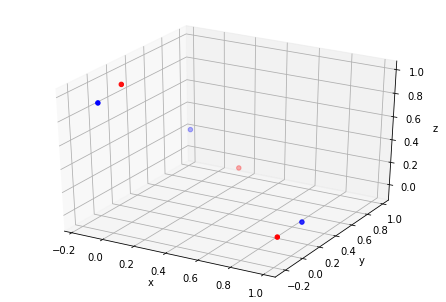

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#  draw
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a[0],Ys_i,Zs_i, color='red')
ax.scatter(Xs,Ys,Zs, color="blue")


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

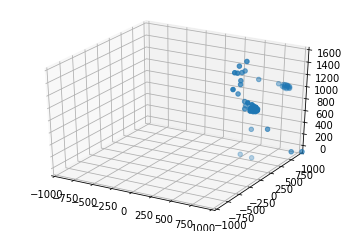

In [ ]:
import matplotlib.pyplot as plt
#get a single pose
Epose = move['jointsLocation_amass'][0][:][:] #kicking
pose = move['jointsLocation_amass'][300][:][:] #kicking
#pose = move['jointsLocation_amass'][:][:,20][:] # right wrist during kicking motion

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pose[:,0], pose[:,1], pose[:,2])
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.show()



In [ ]:
# import cv2
# def rot_matrix_to_aa(data):
#     """
#     Converts the orientation data given in rotation matrices to angle axis representation. `data` is expected in format
#     (seq_length, n*9). Returns an array of shape (seq_length, n*3).
#     """
#     seq_length, n_joints = data.shape[0], data.shape[1]//9
#     data_r = np.reshape(data, [seq_length, n_joints, 3, 3])
#     data_c = np.zeros([seq_length, n_joints, 3])
#     for i in range(seq_length):
#         for j in range(n_joints):
#             data_c[i, j] = np.ravel(cv2.Rodrigues(data_r[i, j])[0])
#     return np.reshape(data_c, [seq_length, n_joints*3])

# pose2 = rot_matrix_to_aa(rot_matrix)

# pose2.shape

(581, 3)

In [ ]:
# dict2ntuple function can be used to convert the dictionary to a namedtuple 
# so that the attributes are accessible by dotted notation
move =dict2ntuple(move)
print(move.description)

kicking


## Working with MoVi data processed in AMASS

The original "MoShed" MoVi data is provided in the [AMASS project webpage](https://amass.is.tue.mpg.de/)  
You have to follow the installation instructions in the [AMASS github page](https://github.com/nghorbani/amass) if you are going to use these original `npz` files.  
Also, please cite the AMASS paper if you use MoVi data processed in AMASS (either original npz files or the MoVi mat files) in your research/projects

**Extracting joints and mesh vertices from original files**

In [ ]:
npz_bdata_path = '/home/saeedghorbani/Projects/Data/amass/BMLmovi/Subject_1_F_MoSh/Subject_1_F_1_poses.npz'
bm_path = '/home/saeedghorbani/Projects/Codes/AMASS/amass-master/body_models/smplh/male/model.npz'

joints, verts = amass_fk(npz_bdata_path, bm_path)
print('Shape of joints tensor: ', joints.shape)
print('Shape of verts tensor: ', verts.shape)

**Converting the original `npz` file to a MoVi style file**

In [ ]:
movi_file = npz2movi(npz_bdata_path, bm_path, savefile=True)
pretty_dict(movi_file)

### Motion Visualization
The current implementation just takes the 3D location of the joints, therefore, the forward kinematics should be done in advance

In [ ]:
from player import *
from IPython.display import HTML
%matplotlib qt

**Realtime animation**  
This might be slow

In [ ]:
play_motion(movi_file['jointsLocation'], output='interactive')

**Interactive JavaScript widget animation**  

In [ ]:
anim = play_motion(movi_file['jointsLocation'])
HTML(anim)